In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\shaha\AppData\Local\Temp\ipykernel_33952\441528334.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_train_path = "Data/training_data"
data_test_path = "Data/test_data"
data_val_path = "Data/Val"

In [3]:
img_width =180
img_height = 180

In [4]:
data_train =tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1035 files belonging to 13 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['asteroids',
 'earth',
 'elliptical',
 'jupiter',
 'mars',
 'mercury',
 'moon',
 'neptune',
 'pluto',
 'saturn',
 'spiral',
 'uranus',
 'venus']

In [7]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height ),
    batch_size=32,
    validation_split=False)

Found 1033 files belonging to 13 classes.


In [8]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height ),
    batch_size=32,
    validation_split=False)

Found 121 files belonging to 11 classes.


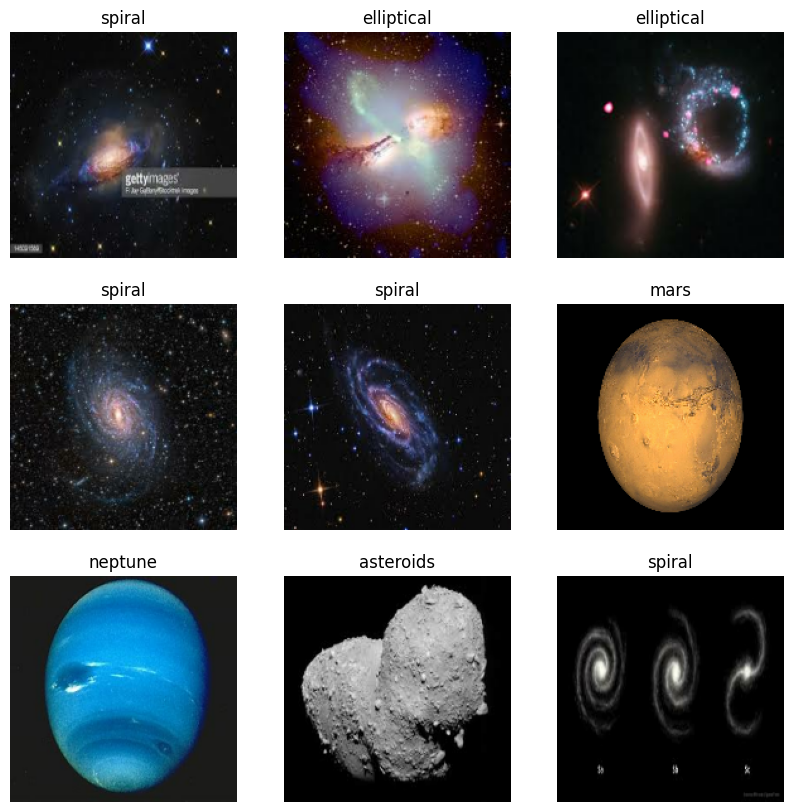

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(data_cat[labels[i]])
    plt.axis("off")

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.2793 - loss: 2.3238 - val_accuracy: 0.5499 - val_loss: 1.2861
Epoch 2/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.5839 - loss: 1.2411 - val_accuracy: 0.8093 - val_loss: 0.6696
Epoch 3/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - accuracy: 0.7694 - loss: 0.6876 - val_accuracy: 0.8006 - val_loss: 0.5221
Epoch 4/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 260ms/step - accuracy: 0.8148 - loss: 0.5196 - val_accuracy: 0.8790 - val_loss: 0.3541
Epoch 5/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.8751 - loss: 0.3900 - val_accuracy: 0.9468 - val_loss: 0.1695
Epoch 6/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.9283 - loss: 0.2299 - val_accuracy: 0.9322 - val_loss: 0.1786
Epoch 7/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - accuracy: 0.9288 - loss: 0.2134 - val_accuracy: 0.9700 - val_loss: 0.0974
Epoch 8/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.9660 - loss: 0.1435 - val_accuracy:

In [15]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

You must install pydot (`pip install pydot`) for `plot_model` to work.


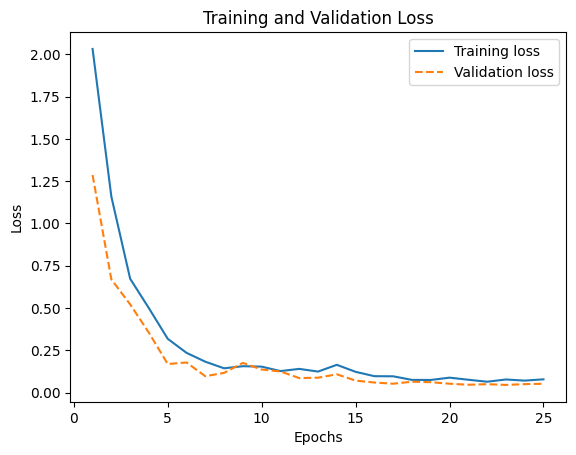

In [16]:
import matplotlib.pyplot as plt

trainloss = history.history["loss"]
validloss = history.history["val_loss"]


epochs = range(1, len(trainloss) + 1)
plt.plot(epochs, trainloss, "-", label="Training loss")
plt.plot(epochs, validloss, "--", label="Validation loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

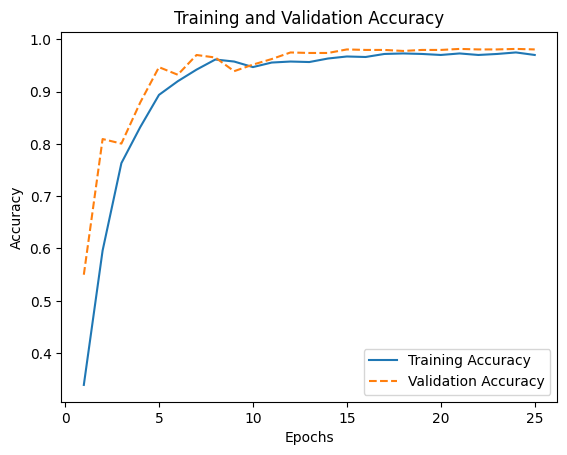

In [17]:
trainaccuracy = history.history["accuracy"]
validaccuracy = history.history["val_accuracy"]


epochs = range(1, len(trainaccuracy) + 1)
plt.plot(epochs, trainaccuracy, "-", label="Training Accuracy")
plt.plot(epochs, validaccuracy, "--", label="Validation Accuracy")

plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Loss')

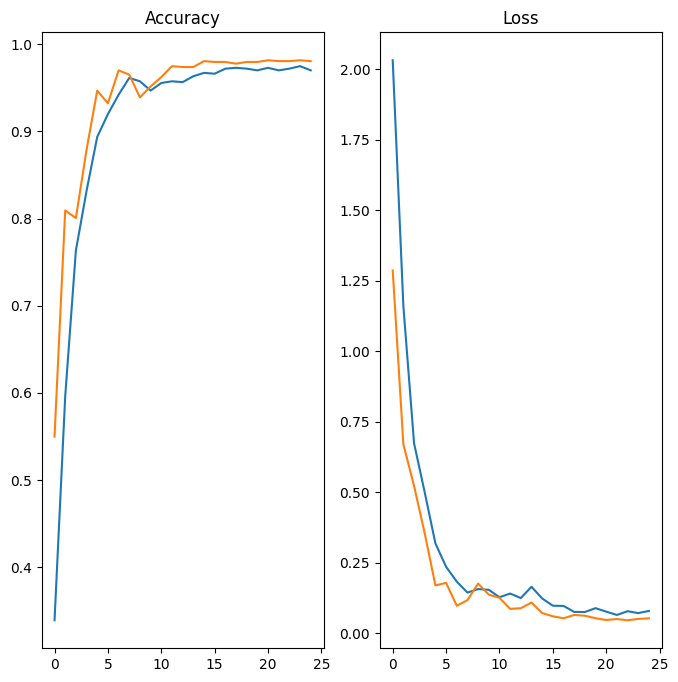

In [18]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [19]:
image = 'static/000.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


In [21]:
score = tf.nn.softmax(predict)

In [22]:
print('object in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

object in image is elliptical with accuracy of 59.56


In [23]:
model.save('space Exploration.keras')

In [24]:
from keras.models import save_model

save_model(model, 'space.h5')

In [25]:
model.save('space.h5')